In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\DataScience\Datascience Assignment\13) diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Data Visualization
# Histogram

In [6]:
import matplotlib.pyplot as plt

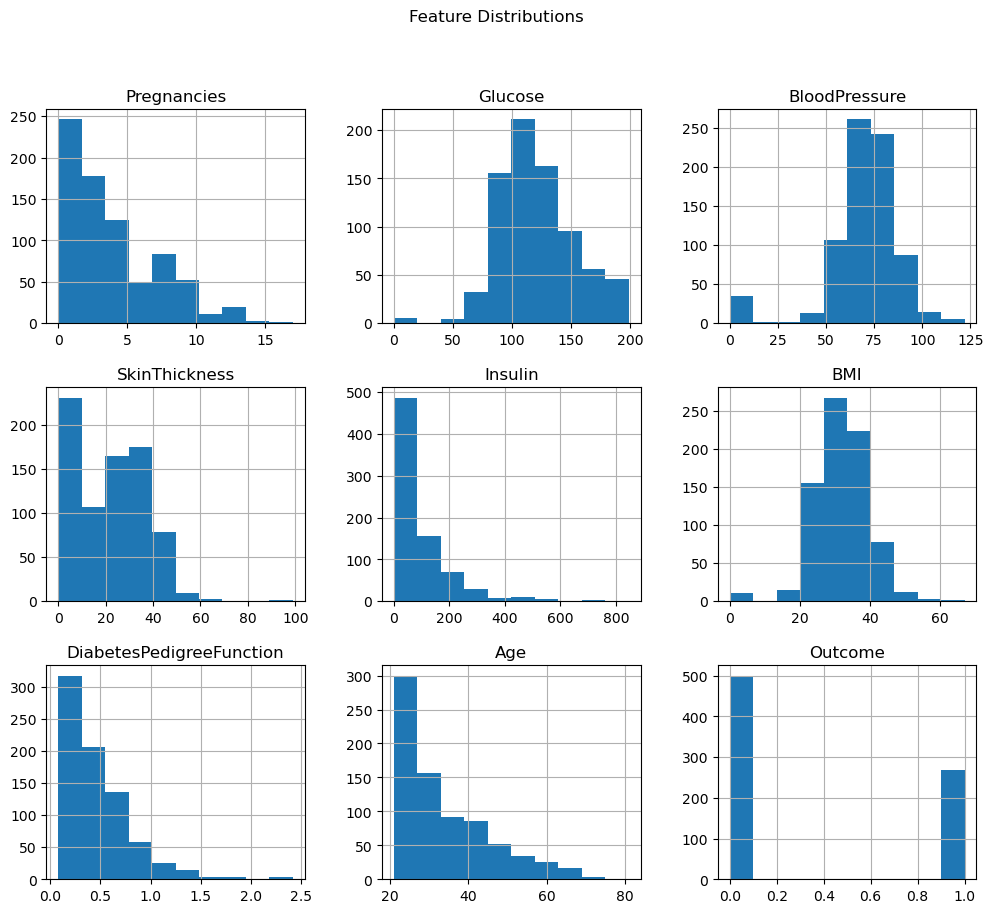

In [7]:
df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()

In [ ]:
# Boxplot (outlier detection)

In [8]:
import seaborn as sns

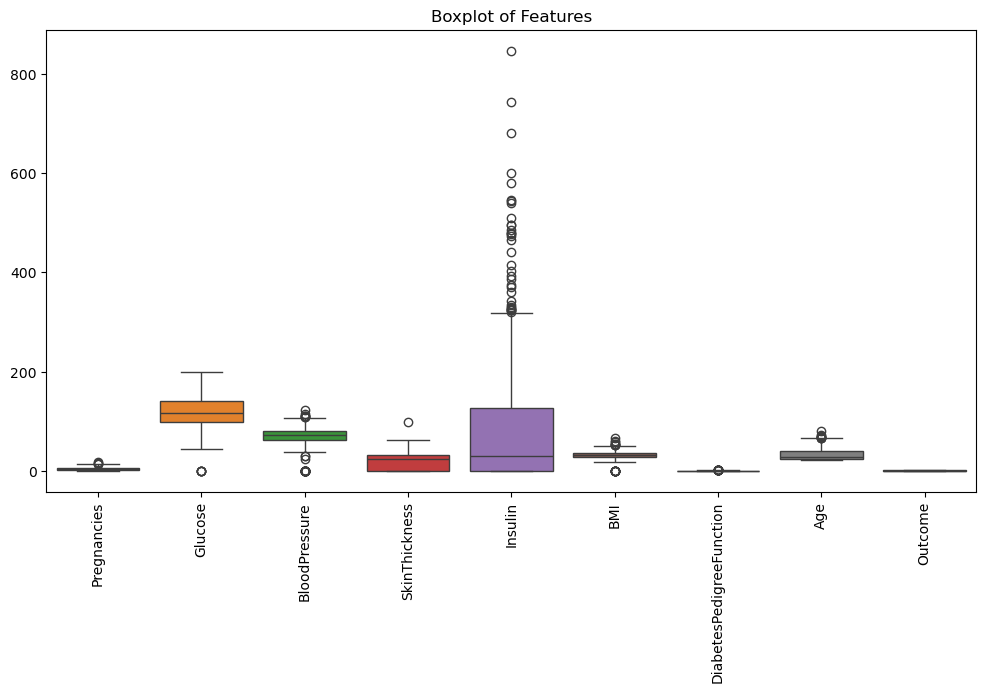

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

In [10]:
# Target variable distribution

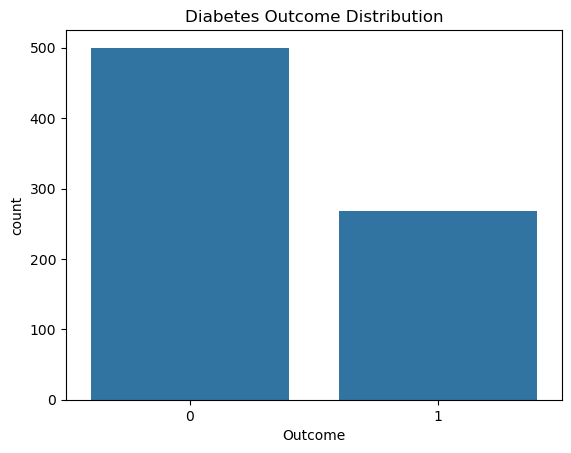

In [11]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

In [12]:
# Data Preprocessing
# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
# Train-test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[-0.85135507 -0.98013068 -0.40478372 ... -0.60767846  0.31079384
  -0.79216928]
 [ 0.35657564  0.16144422  0.46536842 ... -0.30213902 -0.11643851
   0.56103382]
 [-0.5493724  -0.50447447 -0.62232176 ...  0.3725939  -0.76486207
  -0.70759409]
 ...
 [-0.85135507 -0.75815778  0.03029235 ...  0.77997981 -0.78607218
  -0.28471812]
 [ 1.86648903 -0.31421198  0.03029235 ... -0.56948603 -1.01938346
   0.56103382]
 [ 0.05459296  0.73223168 -0.62232176 ... -0.31486983 -0.57700104
   0.30730824]]
[[ 0.96054099  1.20788789 -0.29601471 ... -0.58221684 -0.55579092
   0.56103382]
 [ 1.86648903 -1.67775979  1.98813468 ...  0.44897876 -0.58306107
   1.15306018]
 [-0.5493724   0.03460257  0.3565994  ...  0.499902    0.01688223
  -0.6230189 ]
 ...
 [-0.5493724  -1.23381399 -0.94862882 ... -0.44217793  3.70138246
  -0.70759409]
 [ 0.05459296  2.00064824  0.46536842 ...  0.6399409  -0.64669142
  -0.20014293]
 [-0.85135507 -1.58262854  0.46536842 ...  0.15617013 -0.16794879
  -1.04589487]]


In [18]:

import lightgbm
import lightgbm
print(lightgbm.__version__)

4.6.0


In [20]:
# Model 1: LightGBM

In [21]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Train LightGBM model

In [23]:
lgbm = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_state=42
)

In [24]:
lgbm.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
# Evaluate LightGBM

In [25]:
y_pred_lgbm = lgbm.predict(X_test_scaled)

C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [26]:
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [27]:
# Model 2: XGBoost

In [28]:
from xgboost import XGBClassifier

In [29]:
import xgboost
print(xgboost.__version__)

3.1.3


In [30]:

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [31]:
xgb.fit(X_train_scaled, y_train)

C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:39:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [32]:
# Evaluate XGBoost

In [33]:
y_pred_xgb = xgb.predict(X_test_scaled)

In [34]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [35]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

In [36]:
lgbm_cv = cross_val_score(lgbm, X_train_scaled, y_train, cv=5)
xgb_cv = cross_val_score(xgb, X_train_scaled, y_train, cv=5)

[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:39:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:39:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:39:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, ite

In [37]:
print("LightGBM CV Accuracy:", lgbm_cv.mean())
print("XGBoost CV Accuracy:", xgb_cv.mean())

LightGBM CV Accuracy: 0.7459816073570572
XGBoost CV Accuracy: 0.7508863121418099


In [38]:

"""
| Metric      | LightGBM  | XGBoost         |
| ----------- | --------- | --------------- |
| Speed       | Faster    | Slightly slower |
| Accuracy    | High      | Very high       |
| Memory      | Efficient | More memory     |
| Overfitting | Less      | Needs tuning    |
"""

'\n| Metric      | LightGBM  | XGBoost         |\n| ----------- | --------- | --------------- |\n| Speed       | Faster    | Slightly slower |\n| Accuracy    | High      | Very high       |\n| Memory      | Efficient | More memory     |\n| Overfitting | Less      | Needs tuning    |\n'